# Rainfall Weather Forecasting Project

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Importing the Libraries & Dataset:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Importing the required Libraries to perform EDA

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

# Importing the Dataset into Python from the system

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
Weather_Forecasting=pd.DataFrame(data=df)
Weather_Forecasting

# Making a Structured Dataframe of the Dataset and saving it in variable "Weather_Forecasting"

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

# EDA (Exploratory Data Analysis):-

In [4]:
Weather_Forecasting.columns

# Displaying all the column names present in the Weather_Forecasting dataset

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Check Shape of Dataset
Weather_Forecasting.shape

# Displaying rows and columns of dataset

(8425, 23)

In Weather_Forecasting dataset we can see 8425 rows and 23 columns.

In [6]:
# Check duplicate values
Weather_Forecasting.duplicated().any()

True

Dataset have duplicate values. So we have to remove it

In [7]:
# Remove duplicates
Weather_Forecasting.drop_duplicates(inplace=True)

In [8]:
Weather_Forecasting

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[6762 rows x 23 columns]

In [9]:
Weather_Forecasting.info()

# The information regarding the data types and null values present in the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [10]:
# Now checking  features description.
Weather_Forecasting.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6692.000000  6705.000000  6624.000000  3841.000000  3526.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.569574     6.156128    10.591418     4.436790     3.785883   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.500000     0.000000     2.600000     5.400000   
50%      13.200000    23.500000     0.000000     4.600000     9.000000   
75%      17.500000    28.400000     0.800000     7.000000    10.800000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    5820.000000   6699.000000   6662.000000  6708.000000  6666.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        14.418577      9.833499      9.620043    17.251733    18.631086   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000      9.000000    56.000000    38.000000   
50%        37.000000     11.000000     17.000000    68.000000    50.000000   
75%        48.000000     19.000000     24.000000    81.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  5454.000000  5451.000000  4896.000000  4860.000000  6711.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.712043     6.646755     2.908324     2.740519     5.744117   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.100000  1010.300000     1.000000     1.000000    13.800000   
50%    1017.600000  1015.100000     5.000000     5.000000    18.000000   
75%    1022.200000  1019.600000     7.000000     7.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6670.000000  
mean     22.708561  
std       6.012896  
min       7.300000  
25%      18.300000  
50%      22.100000  
75%      26.800000  
max      44.100000

In [11]:
Weather_Forecasting.isnull().sum()

# checking null values

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

Here we can see except Date and Location column every column has null values are present

In [12]:
# Check unique values 
Weather_Forecasting.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Finding categorical and Numerical features in Dataset

# Categorical features in Dataset:

In [13]:
categorical_features = [column_name for column_name in Weather_Forecasting.columns if Weather_Forecasting[column_name].dtype == 'O']
print("Number of Categorical Features : ",len(categorical_features))
print('\n')
print("Categorical Features: ", categorical_features)
print('\n')
print("Categorical Features Null Values are: \n\n",Weather_Forecasting[categorical_features].isnull().sum())

Number of Categorical Features :  7


Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Categorical Features Null Values are: 

 Date              0
Location          0
WindGustDir     942
WindDir9am      794
WindDir3pm      294
RainToday       138
RainTomorrow    138
dtype: int64


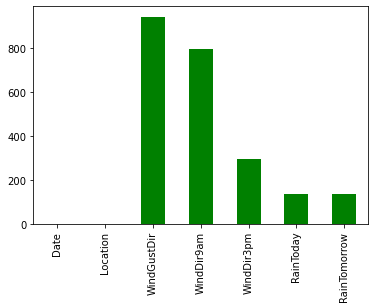

In [14]:
#check null values by barplot
Weather_Forecasting[categorical_features].isnull().sum().plot(kind= "bar", color= "g")
plt.show()

Imputing the missing values in categorical features using the most frequent value which is mode:

In [15]:
categorical_features_with_null = [feature for feature in categorical_features if Weather_Forecasting[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = Weather_Forecasting[each_feature].mode()[0]
    Weather_Forecasting[each_feature].fillna(mode_val,inplace=True)

In [16]:
Weather_Forecasting[categorical_features_with_null].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Cardinality check for Categorical features:

In [17]:
for each_feature in categorical_features:
    unique_values = len(Weather_Forecasting[each_feature].unique())
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 16
Cardinality(no. of unique values) of WindDir9am are: 16
Cardinality(no. of unique values) of WindDir3pm are: 16
Cardinality(no. of unique values) of RainToday are: 2
Cardinality(no. of unique values) of RainTomorrow are: 2


Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

Feature Engineering of Date column to decrease high cardinality:

In [18]:
Weather_Forecasting['Date'] = pd.to_datetime(Weather_Forecasting['Date'])
Weather_Forecasting['year'] = Weather_Forecasting['Date'].dt.year
Weather_Forecasting['month'] = Weather_Forecasting['Date'].dt.month
Weather_Forecasting['day'] = Weather_Forecasting['Date'].dt.day

In [19]:
# Drop Date column to avoid Multicolinarity
Weather_Forecasting.drop('Date', axis = 1, inplace = True)
Weather_Forecasting.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

# Numerical Features in Dataset:

In [20]:
numerical_features = [column_name for column_name in Weather_Forecasting.columns if Weather_Forecasting[column_name].dtype != 'O']
print("Number of Numerical Features: ",len(numerical_features))
print('\n')
print("Numerical Features: ",numerical_features)
print('\n')
print("Numerical Features Null Values are: \n",Weather_Forecasting[numerical_features].isnull().sum())
print('\n')

Number of Numerical Features:  19


Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


Numerical Features Null Values are: 
 MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustSpeed     942
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
year                0
month               0
day                 0
dtype: int64




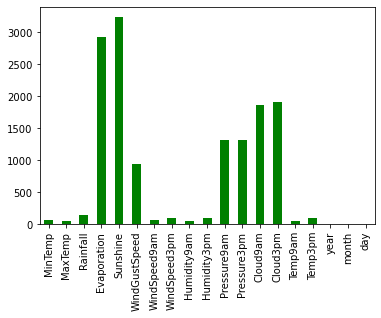

In [21]:
#check null values by barplot
Weather_Forecasting[numerical_features].isnull().sum().plot(kind= "bar", color= "g")
plt.show()

Missing values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the missing values with mean values, then outliers in numerical features need to be addressed properly.

# Outliers detection and treatment:

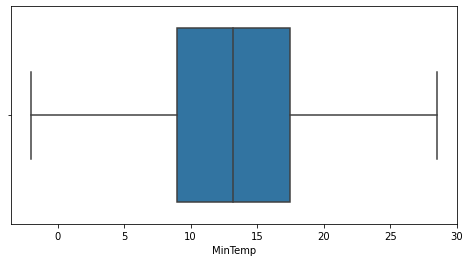

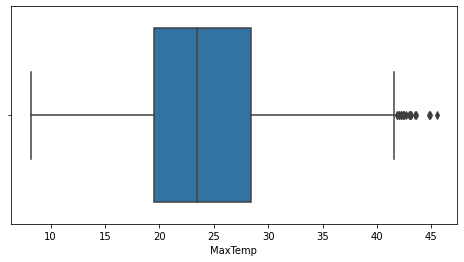

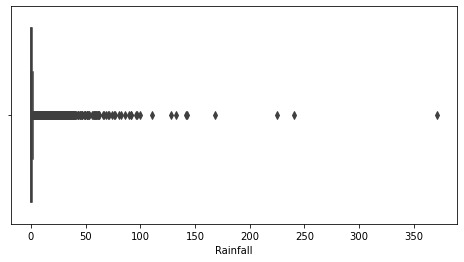

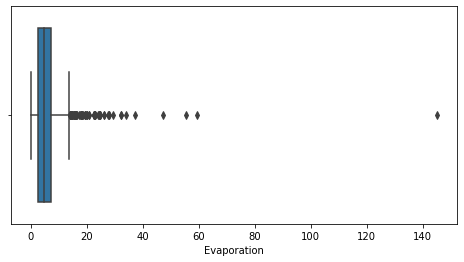

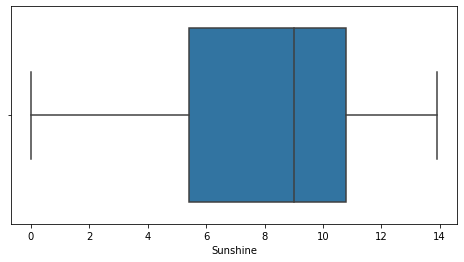

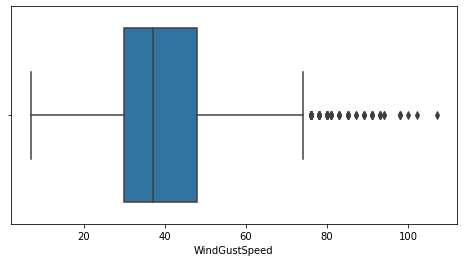

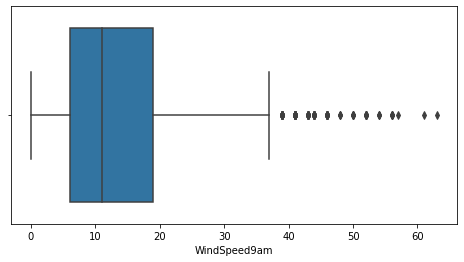

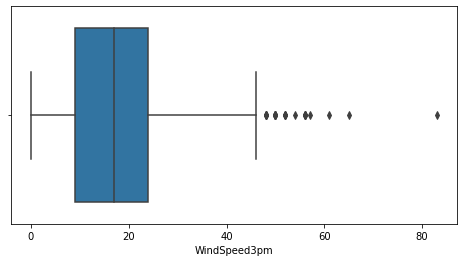

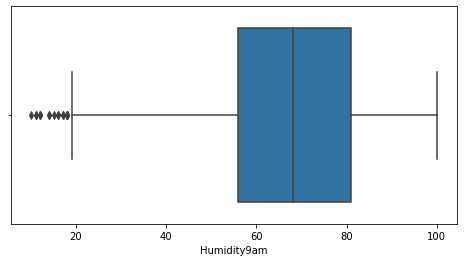

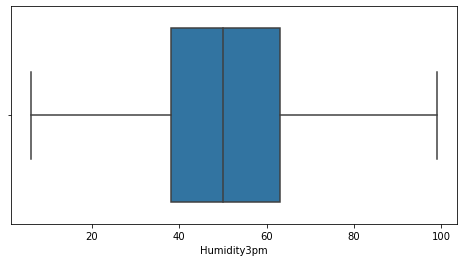

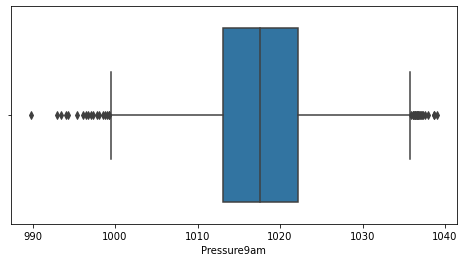

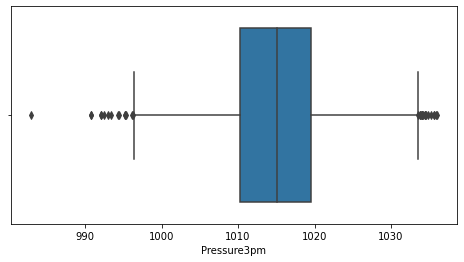

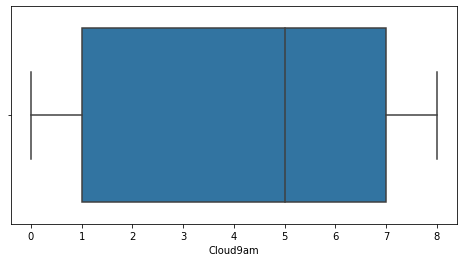

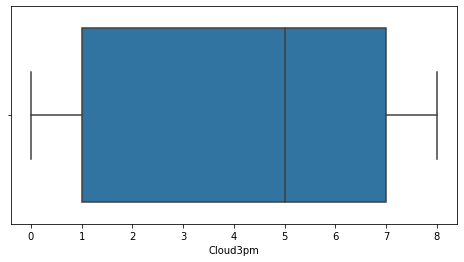

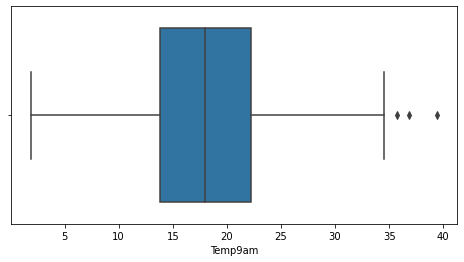

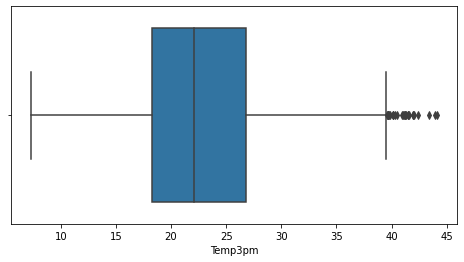

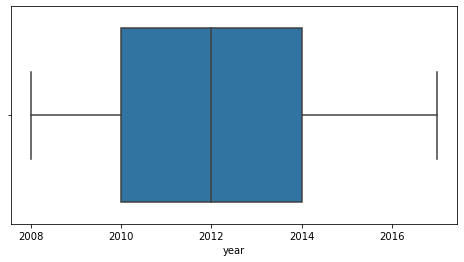

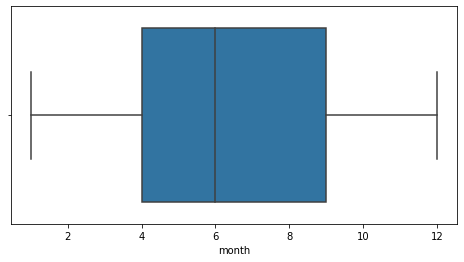

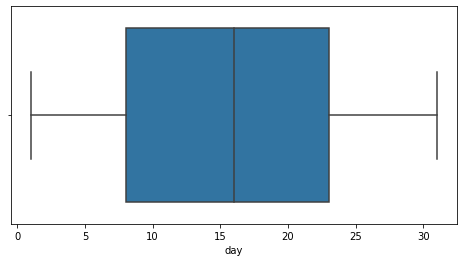

In [22]:
for i in Weather_Forecasting.columns:
    if Weather_Forecasting[i].dtypes!='object':
        plt.figure(figsize=(8,4))
        sns.boxplot(Weather_Forecasting[i])

In [23]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = Weather_Forecasting[feature].quantile(0.25)
    q3 = Weather_Forecasting[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    Weather_Forecasting.loc[Weather_Forecasting[feature]<lower_limit,feature] = lower_limit
    Weather_Forecasting.loc[Weather_Forecasting[feature]>upper_limit,feature] = upper_limit

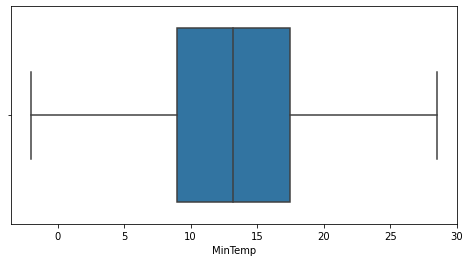

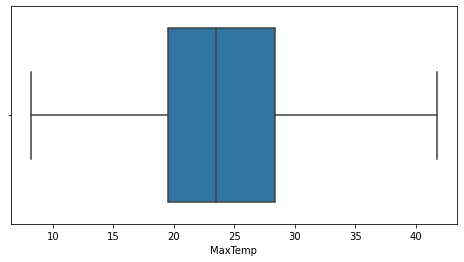

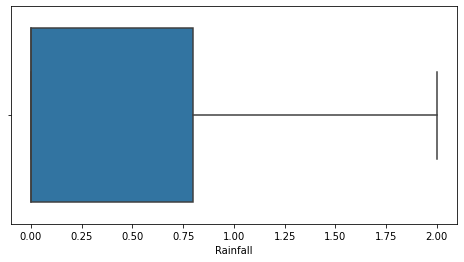

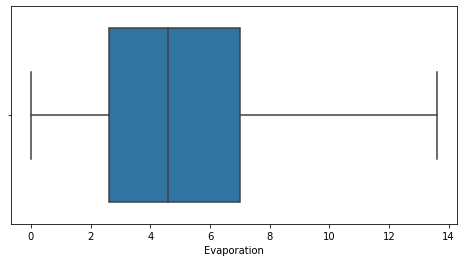

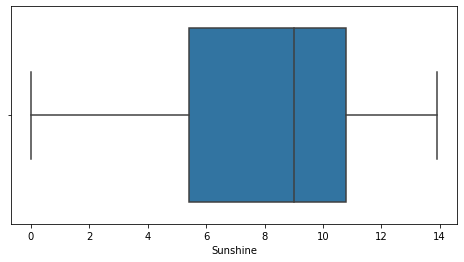

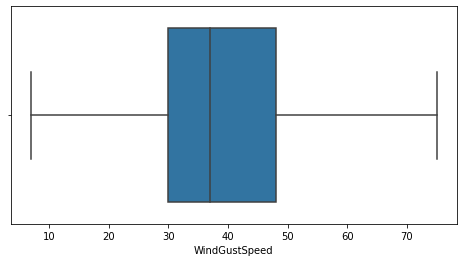

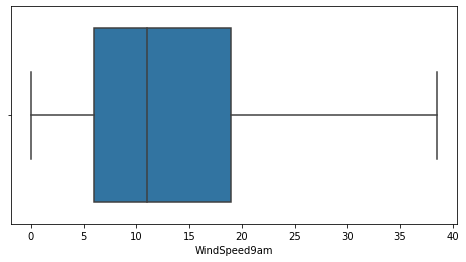

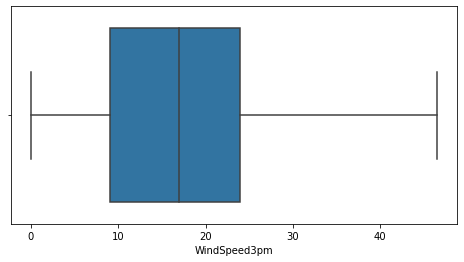

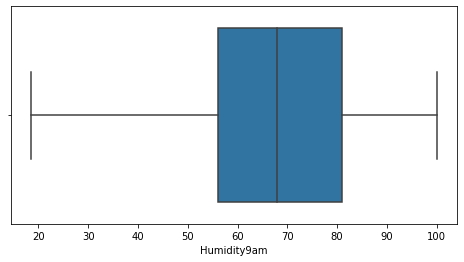

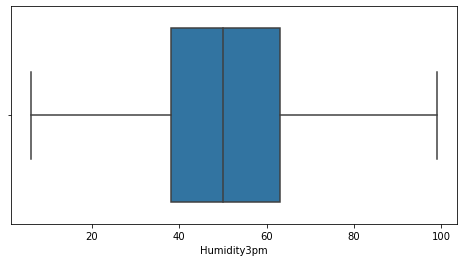

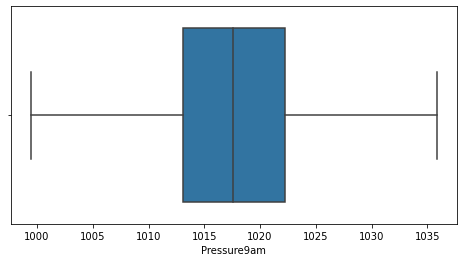

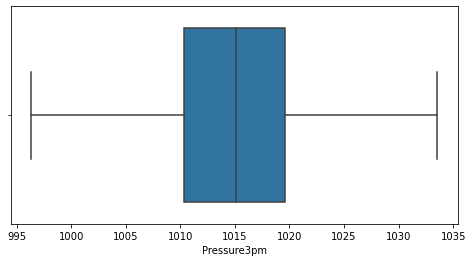

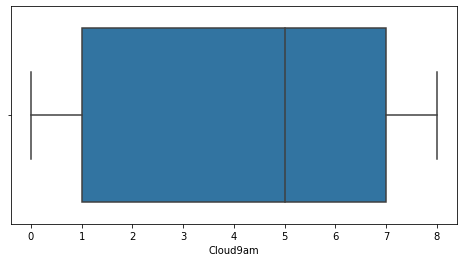

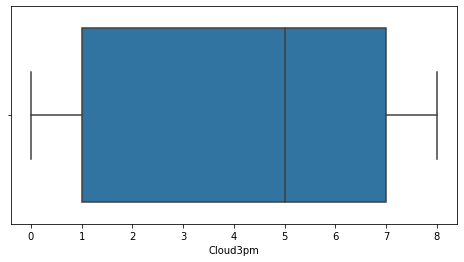

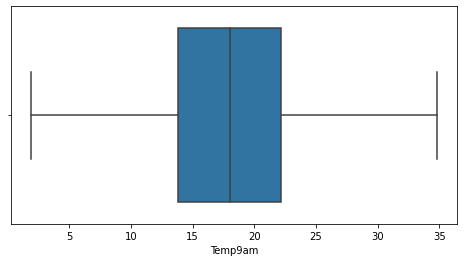

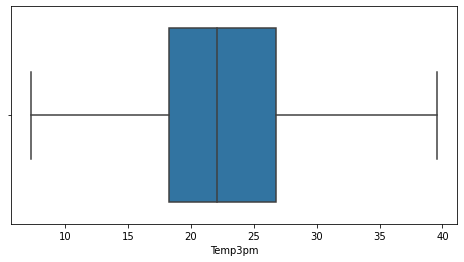

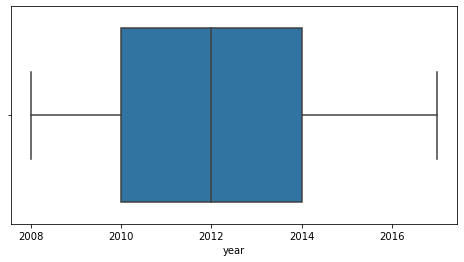

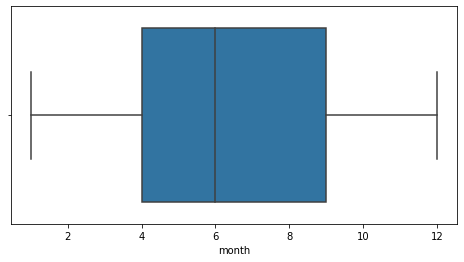

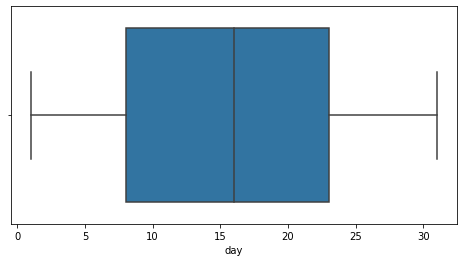

In [24]:
for i in Weather_Forecasting.columns:
    if Weather_Forecasting[i].dtypes!='object':
        plt.figure(figsize=(8,4))
        sns.boxplot(Weather_Forecasting[i])

Now, numerical features are free from outliers. Let’s Impute missing values in numerical features using mean..

In [25]:
numerical_features_with_null = [feature for feature in numerical_features if Weather_Forecasting[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = Weather_Forecasting[feature].mean()
    Weather_Forecasting[feature].fillna(mean_value,inplace=True)

In [26]:
Weather_Forecasting[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

Now No Null values present.

It’s time to do some analysis on Dataset to understand about data and get some insights.

# Univariate Analysis:

<AxesSubplot:xlabel='RainToday', ylabel='count'>

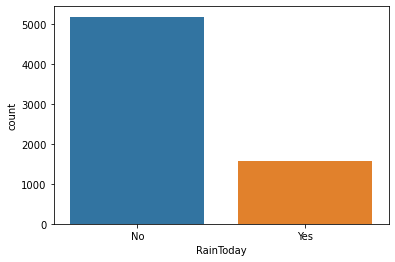

In [27]:
sns.countplot(Weather_Forecasting["RainToday"])

# Graphical representation showing RainToday in the Dataset

 ‘No’ values is more than 'Yes' values. As this data is released by the meteorological department of Australia forecasting RainToday

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

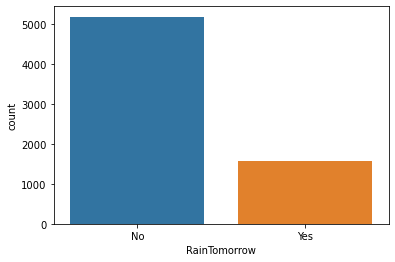

In [28]:
sns.countplot(Weather_Forecasting["RainTomorrow"])

# Graphical representation showing RainTomorrow in the Dataset

Looks like the Target variable is imbalanced. ‘No’ values is more than 'Yes' values. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.

<AxesSubplot:xlabel='Location', ylabel='count'>

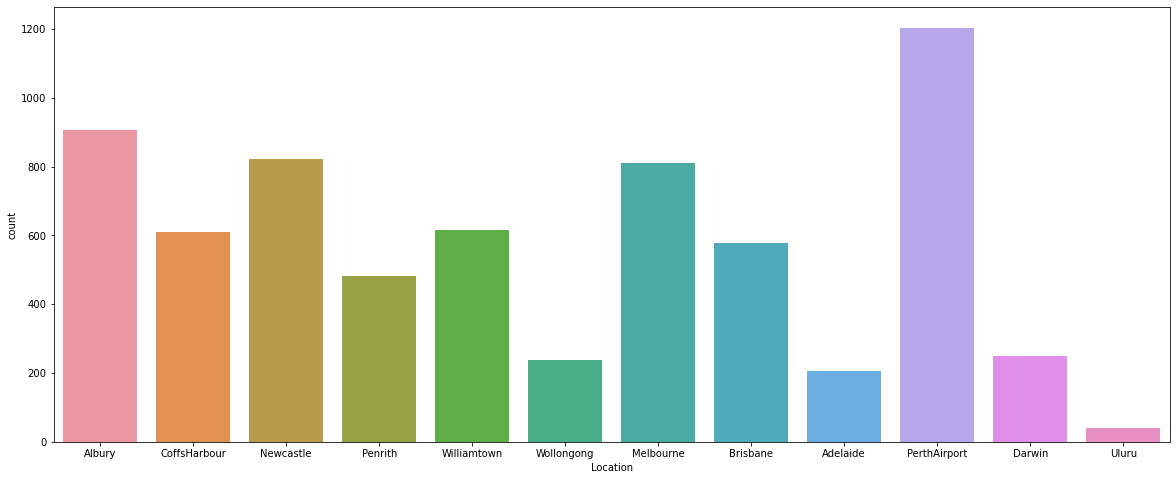

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(Weather_Forecasting["Location"])

# Graphical representation showing Location in the Dataset

As we can see most of the time Weather Forecasting of Location from PerthAirport

# Bi-variate Analysis:

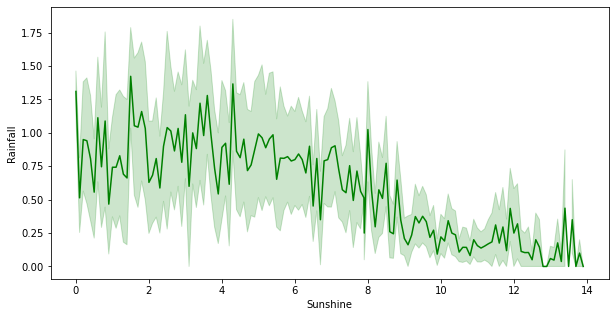

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Weather_Forecasting,x='Sunshine',y='Rainfall',color='green')
plt.show()

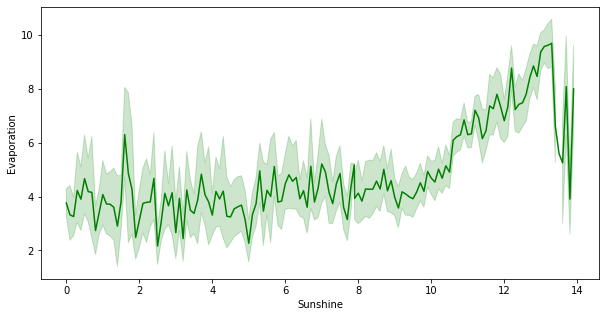

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Weather_Forecasting,x='Sunshine',y='Evaporation',color='g')
plt.show()

# Multivariate Analysis:-

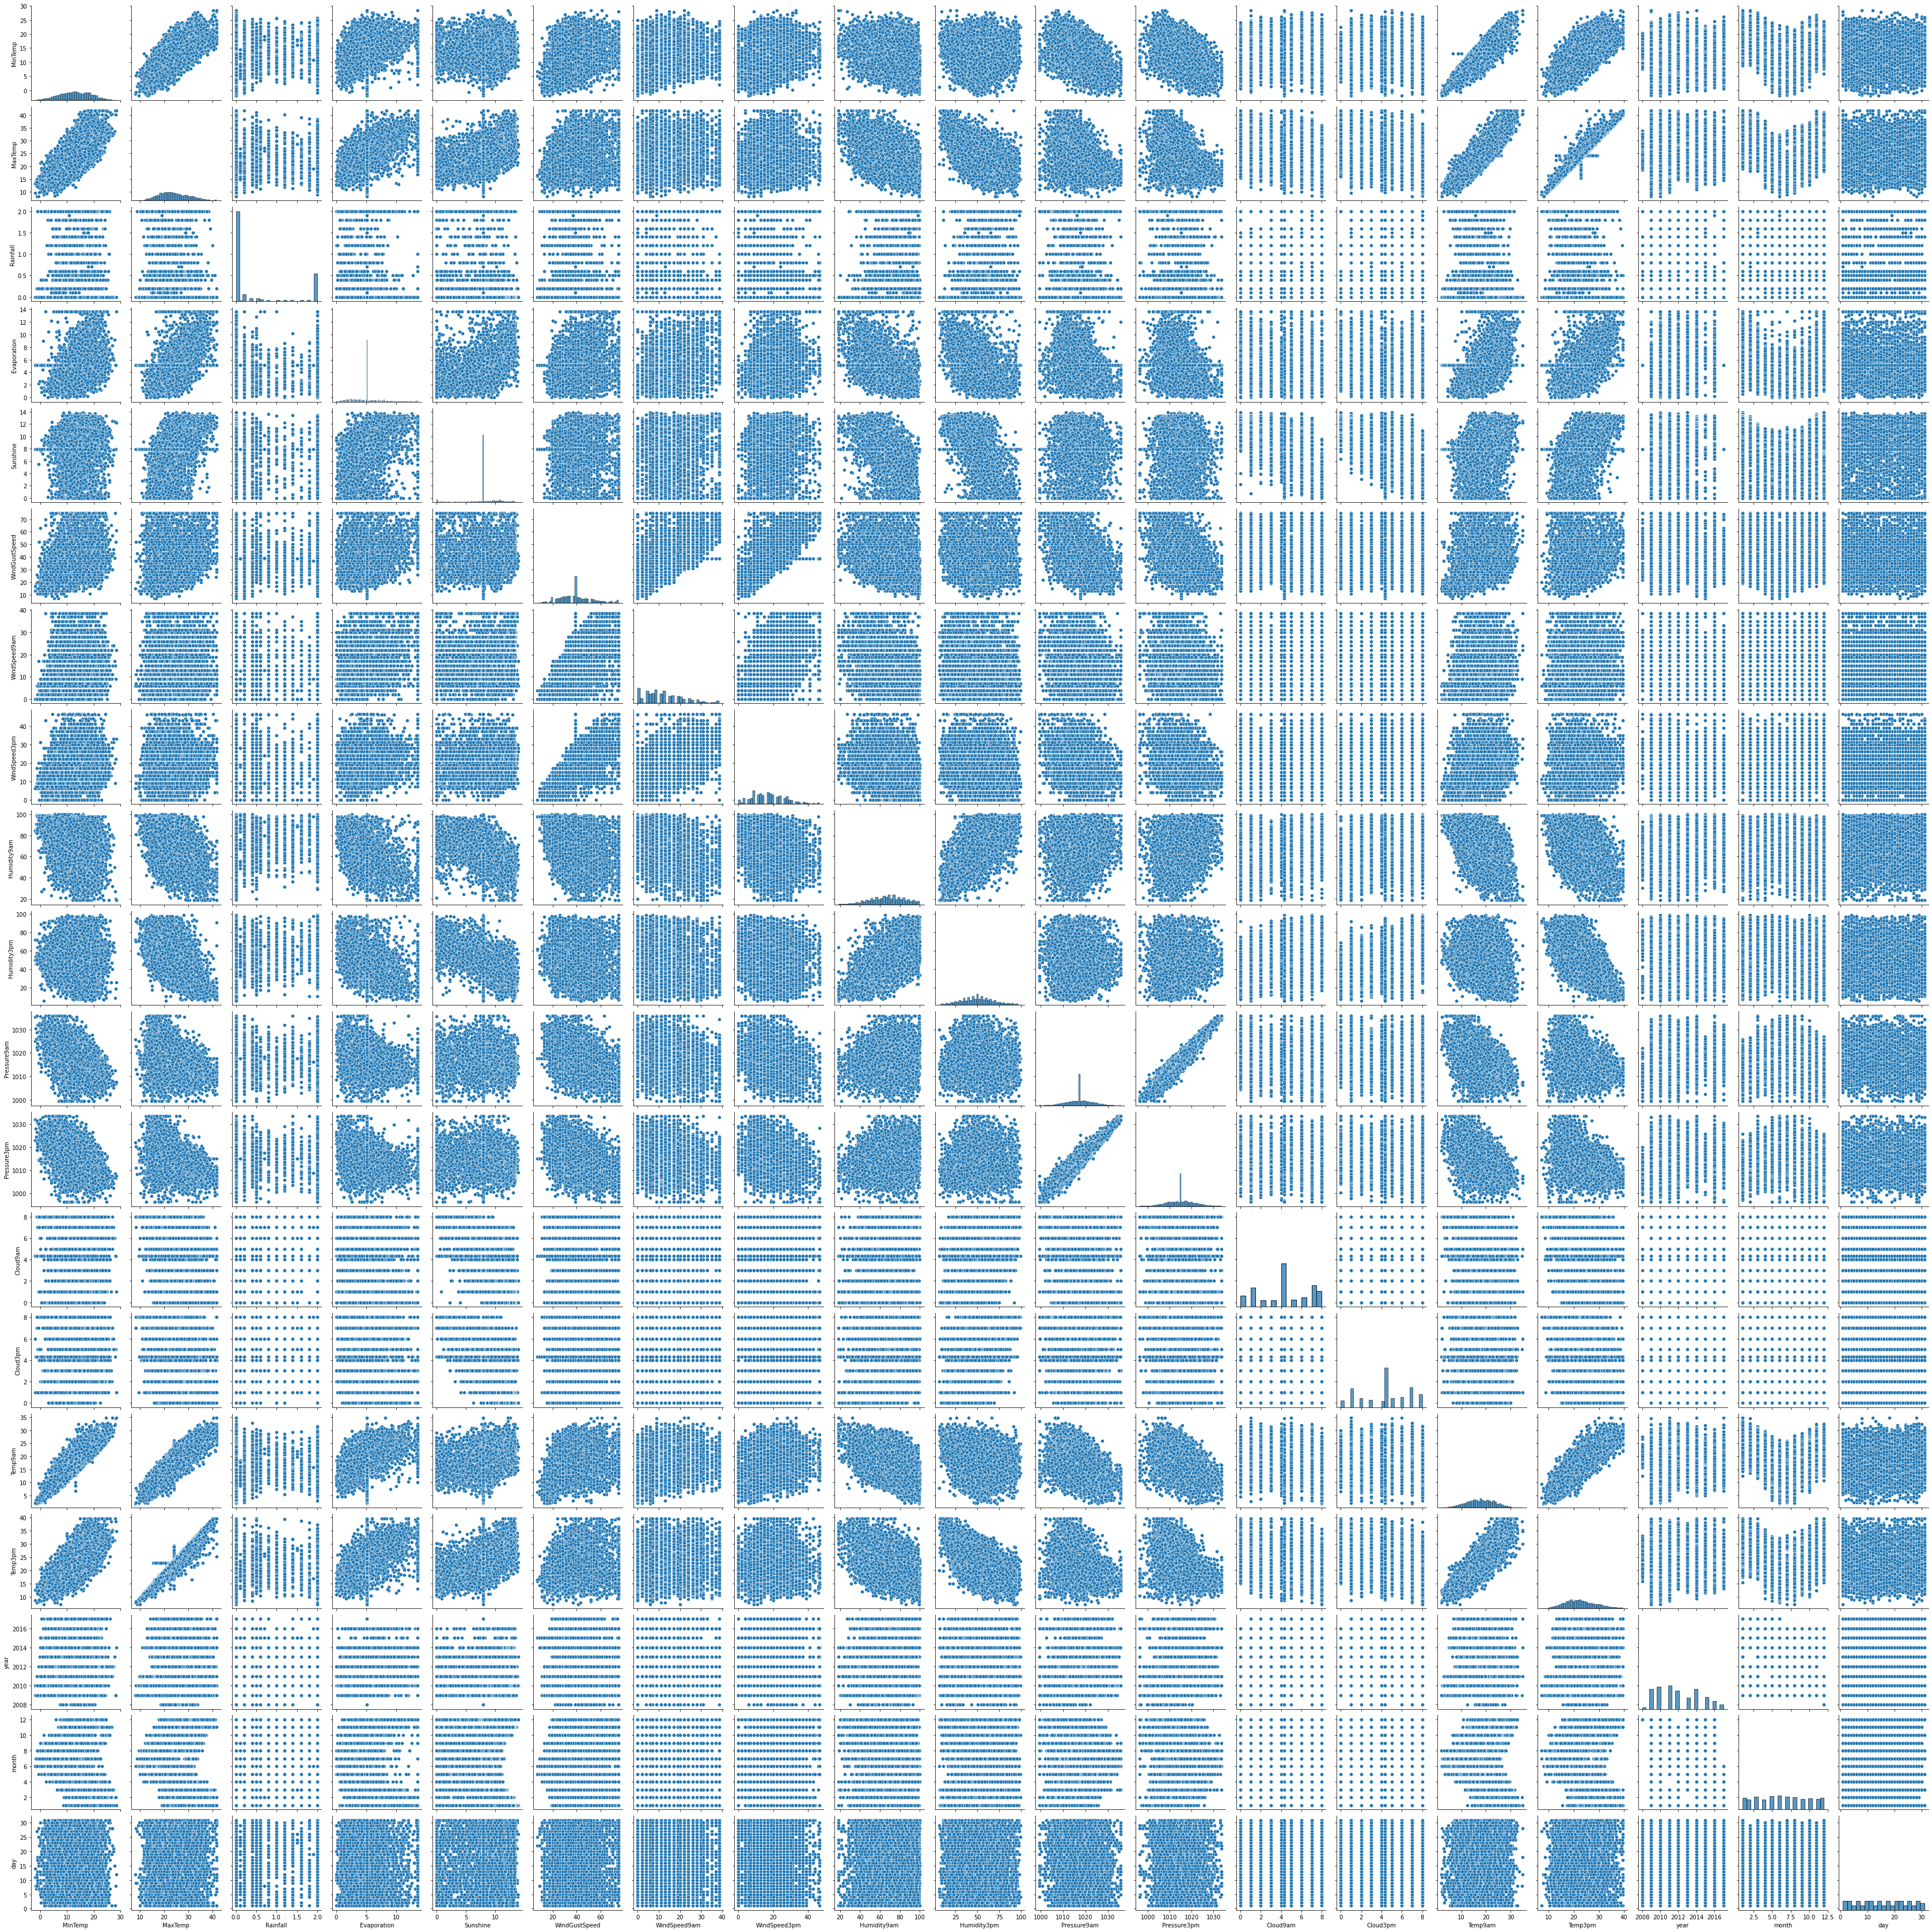

In [32]:
sns.pairplot(Weather_Forecasting)

# It is showing the correlation of each variable with others in graphical presentation

# Label Encoding:-

In [33]:
Weather_Forecasting.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

# Importing the Label Encoder from Sklearn Library

In [35]:
le=LabelEncoder()

In [36]:
for i in Weather_Forecasting.columns:
    if Weather_Forecasting[i].dtypes=="object":
        Weather_Forecasting[i]=le.fit_transform(Weather_Forecasting[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in Weather_Forecasting dataset

In [37]:
Weather_Forecasting

Location  MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.90000       0.6     5.120047  7.890896   
1            1      7.4  25.10000       0.0     5.120047  7.890896   
2            1     12.9  25.70000       0.0     5.120047  7.890896   
3            1      9.2  28.00000       0.0     5.120047  7.890896   
4            1     17.5  32.30000       1.0     5.120047  7.890896   
...        ...      ...       ...       ...          ...       ...   
8420         9      2.8  23.40000       0.0     5.120047  7.890896   
8421         9      3.6  25.30000       0.0     5.120047  7.890896   
8422         9      5.4  26.90000       0.0     5.120047  7.890896   
8423         9      7.8  27.00000       0.0     5.120047  7.890896   
8424         9     14.9  24.09484       0.0     5.120047  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13      44.000000          13          14  ...       1007.1   
1              14      44.000000           6          15  ...       1007.8   
2              15      46.000000          13          15  ...       1008.7   
3               4      24.000000           9           0  ...       1012.8   
4              13      41.000000           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            0      31.000000           9           1  ...       1020.3   
8421            6      22.000000           9           3  ...       1019.1   
8422            3      37.000000           9          14  ...       1016.8   
8423            9      28.000000          10           3  ...       1016.5   
8424            0      38.841753           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  \
0     8.000000  4.320988     16.9     21.8          0             0  2008   
1     4.336806  4.320988     17.2     24.3          0             0  2008   
2     4.336806  2.000000     21.0     23.2          0             0  2008   
3     4.336806  4.320988     18.1     26.5          0             0  2008   
4     7.000000  8.000000     17.8     29.7          0             0  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8420  4.336806  4.320988     10.1     22.4          0             0  2017   
8421  4.336806  4.320988     10.9     24.5          0             0  2017   
8422  4.336806  4.320988     12.5     26.1          0             0  2017   
8423  3.000000  2.000000     15.1     26.0          0             0  2017   
8424  8.000000  8.000000     15.0     20.9          0             0  2017   

      month  day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  
8424      6   25  

[6762 rows x 25 columns]

# Checking Correlation:-

In [38]:
Weather_Forecasting_corr=Weather_Forecasting.corr()
Weather_Forecasting_corr

# Showing the Correlation between all the independent variable and target variable

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090425  0.071025  0.004019     0.145403  0.065573   
MinTemp        0.090425  1.000000  0.728384  0.082542     0.370291  0.039286   
MaxTemp        0.071025  0.728384  1.000000 -0.242086     0.471941  0.356101   
Rainfall       0.004019  0.082542 -0.242086  1.000000    -0.184959 -0.279035   
Evaporation    0.145403  0.370291  0.471941 -0.184959     1.000000  0.373191   
Sunshine       0.065573  0.039286  0.356101 -0.279035     0.373191  1.000000   
WindGustDir   -0.086385 -0.136250 -0.196270  0.116761    -0.121132 -0.099108   
WindGustSpeed  0.264633  0.246654  0.167953  0.091236     0.228744  0.011693   
WindDir9am    -0.088884 -0.020766 -0.193141  0.160500    -0.117726 -0.082495   
WindDir3pm    -0.001275 -0.139552 -0.161352  0.106675    -0.032721 -0.053334   
WindSpeed9am   0.246675  0.173003  0.057087  0.034355     0.187909  0.011179   
WindSpeed3pm   0.230818  0.190590  0.117435  0.018171     0.141353  0.049915   
Humidity9am   -0.033764 -0.153919 -0.424584  0.422008    -0.346661 -0.379014   
Humidity3pm   -0.001483  0.067683 -0.430233  0.406144    -0.260006 -0.445111   
Pressure9am   -0.037976 -0.443359 -0.340416 -0.120830    -0.273322 -0.003697   
Pressure3pm   -0.024773 -0.442515 -0.415963 -0.043986    -0.291303 -0.059799   
Cloud9am      -0.008566  0.095403 -0.245346  0.324998    -0.121258 -0.542442   
Cloud3pm      -0.010776  0.047495 -0.241781  0.279498    -0.161210 -0.562537   
Temp9am        0.098412  0.891481  0.867002 -0.098544     0.435323  0.236048   
Temp3pm        0.066654  0.696975  0.974671 -0.253328     0.460883  0.375138   
RainToday     -0.004280  0.075933 -0.225827  0.970694    -0.168908 -0.256123   
RainTomorrow  -0.004506  0.097146 -0.160322  0.344580    -0.103713 -0.345509   
year           0.503047  0.032873  0.081679 -0.001109     0.126766  0.066165   
month         -0.067376 -0.237177 -0.171594 -0.004788    -0.044142 -0.004996   
day           -0.000710  0.014344  0.016193 -0.007397     0.009827  0.001598   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.086385       0.264633   -0.088884   -0.001275  ...   
MinTemp          -0.136250       0.246654   -0.020766   -0.139552  ...   
MaxTemp          -0.196270       0.167953   -0.193141   -0.161352  ...   
Rainfall          0.116761       0.091236    0.160500    0.106675  ...   
Evaporation      -0.121132       0.228744   -0.117726   -0.032721  ...   
Sunshine         -0.099108       0.011693   -0.082495   -0.053334  ...   
WindGustDir       1.000000       0.008440    0.378772    0.455305  ...   
WindGustSpeed     0.008440       1.000000   -0.072812    0.078717  ...   
WindDir9am        0.378772      -0.072812    1.000000    0.216648  ...   
WindDir3pm        0.455305       0.078717    0.216648    1.000000  ...   
WindSpeed9am      0.071460       0.594453    0.065137    0.015926  ...   
WindSpeed3pm      0.134886       0.628169    0.045818    0.085981  ...   
Humidity9am       0.015340      -0.273388    0.015265   -0.005117  ...   
Humidity3pm       0.025385      -0.097654    0.126725   -0.009618  ...   
Pressure9am      -0.100274      -0.391664   -0.027393   -0.139237  ...   
Pressure3pm      -0.023350      -0.359676    0.051713   -0.049848  ...   
Cloud9am          0.115171       0.011380    0.079312    0.070565  ...   
Cloud3pm          0.078248       0.057047    0.058119    0.050584  ...   
Temp9am          -0.153283       0.225489   -0.071016   -0.146729  ...   
Temp3pm          -0.209753       0.132679   -0.201873   -0.175625  ...   
RainToday         0.112410       0.085580    0.157884    0.094507  ...   
RainTomorrow      0.045179       0.183524    0.040399    0.004301  ...   
year             -0.174132      -0.027275   -0.062314    0.010694  ...   
month             0.032066       0.048581    0.019799    0.034494  ...   
day               0.013606      -0.003405   -0.014730    0.001723  ...   

         

<AxesSubplot:>

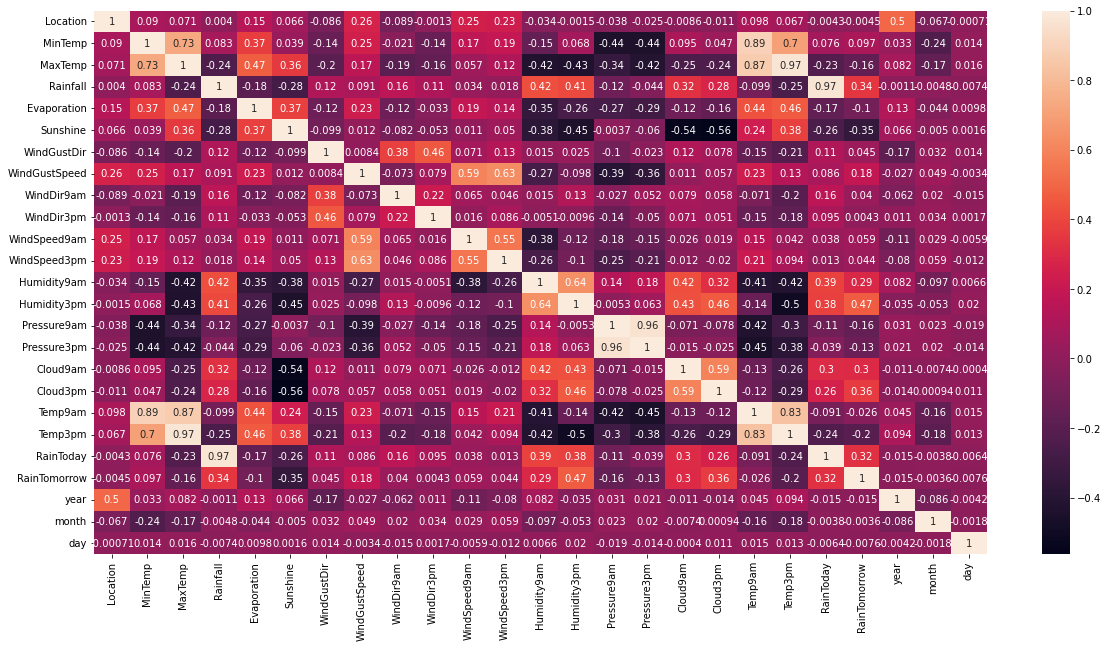

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(Weather_Forecasting_corr,annot=True,annot_kws={'size':10})

# Graphical Representation showing the Correlation between all the independent variable and target variable

In [40]:
corr=Weather_Forecasting.corr()
corr['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.466835
Cloud3pm         0.360511
Rainfall         0.344580
RainToday        0.323691
Cloud9am         0.297967
Humidity9am      0.287968
WindGustSpeed    0.183524
MinTemp          0.097146
WindSpeed9am     0.058503
WindGustDir      0.045179
WindSpeed3pm     0.043826
WindDir9am       0.040399
WindDir3pm       0.004301
month           -0.003575
Location        -0.004506
day             -0.007560
year            -0.014769
Temp9am         -0.025698
Evaporation     -0.103713
Pressure3pm     -0.130445
Pressure9am     -0.158014
MaxTemp         -0.160322
Temp3pm         -0.203297
Sunshine        -0.345509
Name: RainTomorrow, dtype: float64

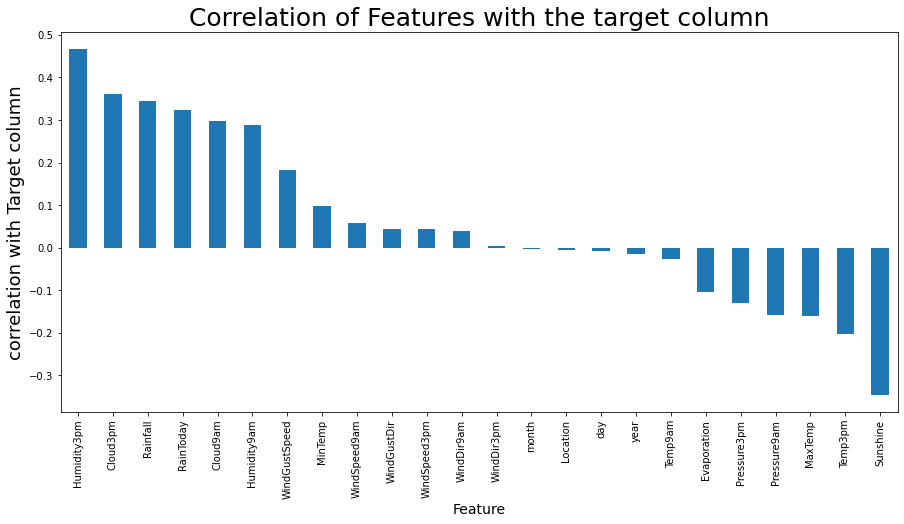

In [41]:
plt.figure(figsize=(15,7))
Weather_Forecasting.corr()["RainTomorrow"].sort_values(ascending=False).drop(["RainTomorrow"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

# Checking Skewness:-

In [42]:
Weather_Forecasting.skew()

# Checking the skewness of the Weather_Forecasting dataset 

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.315077
Rainfall         1.193398
Evaporation      1.019317
Sunshine        -0.882147
WindGustDir      0.105287
WindGustSpeed    0.579534
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am     0.715532
WindSpeed3pm     0.432574
Humidity9am     -0.243475
Humidity3pm      0.150860
Pressure9am      0.051246
Pressure3pm      0.079818
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.052928
Temp3pm          0.325118
RainToday        1.266937
RainTomorrow     1.266937
year             0.354481
month            0.021988
day              0.006240
dtype: float64

Skewness is not present in Dataset

# Splitting data into Independent Features and Dependent Features:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [43]:
X = Weather_Forecasting.drop(['RainTomorrow'],axis=1)
y = Weather_Forecasting['RainTomorrow']

# Feature Scaling:

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [45]:
X

array([[-1.39509696e+00,  5.24984242e-02, -1.95265258e-01, ...,
        -1.76114850e+00,  1.63976797e+00, -1.67596865e+00],
       [-1.39509696e+00, -1.03048387e+00,  1.64267136e-01, ...,
        -1.76114850e+00,  1.63976797e+00, -1.56224503e+00],
       [-1.39509696e+00, -3.77500999e-02,  2.62321425e-01, ...,
        -1.76114850e+00,  1.63976797e+00, -1.44852141e+00],
       ...,
       [ 1.18619268e+00, -1.39147796e+00,  4.58430003e-01, ...,
         2.15038668e+00, -1.36840732e-01,  8.25951016e-01],
       [ 1.18619268e+00, -9.58285046e-01,  4.74772385e-01, ...,
         2.15038668e+00, -1.36840732e-01,  9.39674637e-01],
       [ 1.18619268e+00,  3.23243997e-01, -1.74179407e-15, ...,
         2.15038668e+00, -1.36840732e-01,  1.05339826e+00]])

# Splitting Data into training and testing set:

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Model Building & Evaluation

Import Models

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [48]:
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

lr_accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", lr_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[970  73]
 [159 151]]
accuracy is:-  82.85291943828528
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1043
           1       0.67      0.49      0.57       310

    accuracy                           0.83      1353
   macro avg       0.77      0.71      0.73      1353
weighted avg       0.82      0.83      0.82      1353



# Decision tree

In [49]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
dtree_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", dtree_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[873 170]
 [157 153]]
accuracy:-  75.83148558758315
Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1043
           1       0.47      0.49      0.48       310

    accuracy                           0.76      1353
   macro avg       0.66      0.67      0.66      1353
weighted avg       0.76      0.76      0.76      1353



# Random Forest Classifier

In [50]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
rfc_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", rfc_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[984  59]
 [155 155]]
accuracy:-  84.18329637841833
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1043
           1       0.72      0.50      0.59       310

    accuracy                           0.84      1353
   macro avg       0.79      0.72      0.75      1353
weighted avg       0.83      0.84      0.83      1353



# K Nearest Neighbors Classifier

In [51]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
knn_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", knn_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[973  70]
 [166 144]]
accuracy:-  82.55728011825573
Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1043
           1       0.67      0.46      0.55       310

    accuracy                           0.83      1353
   macro avg       0.76      0.70      0.72      1353
weighted avg       0.81      0.83      0.81      1353



# Ada Boost Classifier

In [52]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
adb_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", adb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[987  56]
 [165 145]]
accuracy:-  83.6659275683666
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1043
           1       0.72      0.47      0.57       310

    accuracy                           0.84      1353
   macro avg       0.79      0.71      0.73      1353
weighted avg       0.83      0.84      0.82      1353



# Naive Bayes

In [53]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
gnb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", gnb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[852 109]
 [191 201]]
accuracy:-  77.8270509977827
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1043
           1       0.51      0.65      0.57       310

    accuracy                           0.78      1353
   macro avg       0.70      0.73      0.71      1353
weighted avg       0.80      0.78      0.79      1353



# XG Boost Classifier

In [54]:
import xgboost as xgb

In [55]:
from xgboost import XGBClassifier                                                                                                           
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
print("XG Boost Classifier is successfully implemented")

y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
xgb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", xgb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

XG Boost Classifier is successfully implemented
Confusion Matrix:- 
[[974 132]
 [ 69 178]]
accuracy:-  85.14412416851441
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1043
           1       0.72      0.57      0.64       310

    accuracy                           0.85      1353
   macro avg       0.80      0.75      0.77      1353
weighted avg       0.84      0.85      0.85      1353



# Analysing different models

In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy,knn_accuracy, adb_accuracy, gnb_accuracy, xgb_accuracy]})

In [57]:
models.sort_values(['Accuracy Score'], ascending=[False])

Model  Accuracy Score
6   XG Boost Classifier        0.851441
2         Random Forest        0.841833
4  Ada Boost Classifier        0.836659
0   Logistic Regression        0.828529
3        KNN Classifier        0.825573
5           Naive Bayes        0.778271
1         Decision Tree        0.758315

# Cross Validation :-

In [58]:
from sklearn.model_selection import cross_val_score

# Importing the Cross Validation Score from Sklearn Library

In [59]:
scr1=cross_val_score(lr, X, y, cv=5)
scr1

array([0.85809313, 0.80266075, 0.76923077, 0.83949704, 0.85281065])

In [60]:
print("The Cross Validation Score of Logistic Regression is :", scr1.mean())

The Cross Validation Score of Logistic Regression is : 0.8244584683609073


In [61]:
scr2=cross_val_score(dtree,X, y, cv=5)
scr2

array([0.75092387, 0.67331855, 0.63609467, 0.66863905, 0.77810651])

In [62]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.7014165321857629


In [63]:
scr3=cross_val_score(rfc,X, y, cv=5)
scr3

array([0.85070214, 0.77827051, 0.7647929 , 0.72189349, 0.84097633])

In [64]:
print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())

The Cross Validation Score of Random Forest Classifier is : 0.7913270750512776


In [65]:
scr4=cross_val_score(knn,X, y, cv=5)
scr4

array([0.83000739, 0.72875092, 0.75813609, 0.81139053, 0.81952663])

In [66]:
print("The Cross Validation Score of K Neighbors Classifier is :", scr4.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.7895623138587491


In [67]:
scr5=cross_val_score(adb,X, y, cv=5)
scr5

array([0.84700665, 0.76422764, 0.76627219, 0.71227811, 0.82840237])

In [68]:
print("Cross Validation Score of Adaboost Classifier Model is", scr5.mean())

Cross Validation Score of Adaboost Classifier Model is 0.7836373913766034


In [69]:
scr6=cross_val_score(gnb, X, y, cv=5)
scr6

array([0.79674797, 0.76644494, 0.70710059, 0.77810651, 0.84615385])

In [70]:
print("Cross Validation Score of Naive Bayes Model is", scr6.mean())

Cross Validation Score of Naive Bayes Model is 0.7789107702803764


In [71]:
scr7=cross_val_score(xgb, X, y, cv=5)
scr7

array([0.83074649, 0.70066519, 0.70266272, 0.69230769, 0.80473373])

In [72]:
print("Cross Validation Score of xgbboost Classifier Model is", scr7.mean())

Cross Validation Score of xgbboost Classifier Model is 0.746223163952995


In [73]:
models_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Cross Validation Score': [scr1.mean(), scr2.mean(), scr3.mean(),scr4.mean(), scr5.mean(), scr6.mean(), scr7.mean()]})

In [74]:
models_cv.sort_values(['Cross Validation Score'], ascending=[False])

Model  Cross Validation Score
0   Logistic Regression                0.824458
2         Random Forest                0.791327
3        KNN Classifier                0.789562
4  Ada Boost Classifier                0.783637
5           Naive Bayes                0.778911
6   XG Boost Classifier                0.746223
1         Decision Tree                0.701417

<Figure size 720x504 with 0 Axes>

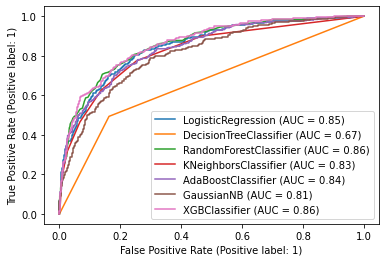

In [75]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,7))
fig = plot_roc_curve(lr, X_test, y_test)
fig = plot_roc_curve(dtree, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rfc, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(knn, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(adb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(gnb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

plt.show()

# Hyper Parameter Tuning:-

In [76]:
from sklearn.model_selection import GridSearchCV

# Importing Grid Search CV to perform Hyper Parameter Tuning

In [77]:
parameter={"penalty":['11','12','elasticnet','none'], 
           "C":np.logspace(-4,4,20),
          "solver":['lbfgs','newton-cg','liblinear','sag','saga'],
          "max_iter":[100,1000,2500,5000]}

# Taking all the parameters to find the best accuracy_score 

In [78]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [79]:
GCV.fit(X_train,y_train)

# Training the GridSearchCV model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['11', '12', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [80]:
GCV.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [81]:
final_model=LogisticRegression(C=0.0001, max_iter=100, penalty='none', solver='lbfgs')
final_model.fit(X_train,y_train)
final_model_pred=final_model.predict(X_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

82.85291943828528


# Saving the Logistic Regression Model (Serialization):-¶

In [82]:
import pickle
file='Rainfall Weather Forecasting'
pickle.dump(lr,open(file,'wb'))

In [83]:
load=pickle.load(open('Rainfall Weather Forecasting','rb'))
result=load.score(X_test,y_test)
print(result*100)

82.85291943828528


# conclusion

In [84]:
conclusion=pd.DataFrame([load.predict(X_test),y_test],index=["Predicted","Original"])

In [85]:
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     0     1     0     0     0     0     0     1     1  ...   
Original      0     0     1     0     0     1     0     0     1     1  ...   

           1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  
Predicted     0     0     0     0     0     0     0     0     0     0  
Original      0     0     0     0     0     0     0     0     0     0  

[2 rows x 1353 columns]

# Results and Conclusion:

The Logistic Regression Model accuracy score is 82.852. The model does a very good job of predicting.


The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.


The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Splitting data into Independent Features and Dependent Features:

In [86]:
x = Weather_Forecasting.drop(['Rainfall'],axis=1)
Y = Weather_Forecasting['Rainfall']

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [88]:
x

array([[-1.39509696e+00,  5.24984242e-02, -1.95265258e-01, ...,
        -1.76114850e+00,  1.63976797e+00, -1.67596865e+00],
       [-1.39509696e+00, -1.03048387e+00,  1.64267136e-01, ...,
        -1.76114850e+00,  1.63976797e+00, -1.56224503e+00],
       [-1.39509696e+00, -3.77500999e-02,  2.62321425e-01, ...,
        -1.76114850e+00,  1.63976797e+00, -1.44852141e+00],
       ...,
       [ 1.18619268e+00, -1.39147796e+00,  4.58430003e-01, ...,
         2.15038668e+00, -1.36840732e-01,  8.25951016e-01],
       [ 1.18619268e+00, -9.58285046e-01,  4.74772385e-01, ...,
         2.15038668e+00, -1.36840732e-01,  9.39674637e-01],
       [ 1.18619268e+00,  3.23243997e-01, -1.74179407e-15, ...,
         2.15038668e+00, -1.36840732e-01,  1.05339826e+00]])

# Splitting Data into training and testing set:

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state = 0)

# Model Building & Evaluation

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

# Linear Regression

In [91]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Linear Regression is successfully implemented")

lr_pred=lr.predict(x_test)
lr_pred

# Accuracy test
lr_accuracy=r2_score(y_test,lr_pred)
print("r2_score:- ", lr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,lr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,lr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,lr_pred)))

# Evolution MAtrix of Linear Regression Model

Linear Regression is successfully implemented
r2_score:-  94.36136001409835
mean_absolute_error:-  0.11635843345930448
mean_squared_error:-  0.03669553694105723
Root_mean_squared_error:-  0.19156079176349536


# Random Forest Regressor

In [92]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print("Random Forest Regressor is successfully implemented")

rfr_pred=rfr.predict(x_test)
rfr_pred

# Accuracy test
rfr_accuracy=r2_score(y_test,rfr_pred)
print("r2_score:- ", rfr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,rfr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,rfr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,rfr_pred)))

# Evolution MAtrix of Random Forest Regressor Model

Random Forest Regressor is successfully implemented
r2_score:-  94.28417218803973
mean_absolute_error:-  0.11519148581966712
mean_squared_error:-  0.03719786529144248
Root_mean_squared_error:-  0.19286748116632435


# KNeighbors Regressor

In [93]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
print("KNeighbors Regressor is successfully implemented")

Knn_pred=knn.predict(x_test)
Knn_pred

# Accuracy test
Knn_accuracy=r2_score(y_test,Knn_pred)
print("r2_score:- ", Knn_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,Knn_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,Knn_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,Knn_pred)))

# Evolution MAtrix of KNeighbors Regressor Model

KNeighbors Regressor is successfully implemented
r2_score:-  87.68543553270463
mean_absolute_error:-  0.14735219372944716
mean_squared_error:-  0.08014158670398051
Root_mean_squared_error:-  0.2830928941248447


# DecisionTree Regressor

In [94]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("DecisionTree Regressor is successfully implemented")

dtr_pred=dtr.predict(x_test)
dtr_pred

# Accuracy test
dtr_accuracy=r2_score(y_test,dtr_pred)
print("r2_score:- ", dtr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,dtr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,dtr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,dtr_pred)))

# Evolution MAtrix of DecisionTree Regressor Model

DecisionTree Regressor is successfully implemented
r2_score:-  88.94119302072437
mean_absolute_error:-  0.12603430246258981
mean_squared_error:-  0.07196928001196715
Root_mean_squared_error:-  0.26827090787479574


# AdaBoost Regressor

In [95]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print("AdaBoost Regressor is successfully implemented")

abr_pred=abr.predict(x_test)
abr_pred

# Accuracy test
abr_accuracy=r2_score(y_test,abr_pred)
print("r2_score:- ", abr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,abr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,abr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,abr_pred)))

# Evolution MAtrix of AdaBoost Regressor Model

AdaBoost Regressor is successfully implemented
r2_score:-  93.43130896614363
mean_absolute_error:-  0.157970511106936
mean_squared_error:-  0.0427481884088977
Root_mean_squared_error:-  0.20675635034720868


# Support Vector Regressor

In [96]:
svr=SVR()
svr.fit(x_train,y_train)
print("Support Vector Regressor is successfully implemented")

svr_pred=svr.predict(x_test)
svr_pred

# Accuracy test
svr_accuracy=r2_score(y_test,svr_pred)
print("r2_score:- ", svr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,svr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,svr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,svr_pred)))

# Evolution MAtrix of Support Vector Regressor Model

Support Vector Regressor is successfully implemented
r2_score:-  93.72643880489188
mean_absolute_error:-  0.13364296111556692
mean_squared_error:-  0.04082752173621191
Root_mean_squared_error:-  0.20205821373112232


In [97]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor', 'AdaBoost Regressor','DecisionTree Regressor','Support Vector Regressor'],
    'r2_Score': [lr_accuracy,rfr_accuracy,Knn_accuracy, abr_accuracy,dtr_accuracy,svr_accuracy]})

In [98]:
models.sort_values(['r2_Score'], ascending=[False])

Model  r2_Score
0         Linear Regression  0.943614
1   Random Forest Regressor  0.942842
5  Support Vector Regressor  0.937264
3        AdaBoost Regressor  0.934313
4    DecisionTree Regressor  0.889412
2      KNeighbors Regressor  0.876854

In [99]:
from sklearn.model_selection import cross_val_score

# Importing the Cross Validation Score from Sklearn Library

# Cross Validation :-

In [100]:
scr1=cross_val_score(lr, x, Y, cv=5)
scr1

array([0.95335276, 0.9351706 , 0.94261551, 0.9499842 , 0.95210433])

In [101]:
print("The Cross Validation Score of Linear Regression Model is :", scr1.mean())

The Cross Validation Score of Linear Regression Model is : 0.9466454808533917


In [102]:
scr2=cross_val_score(rfr,x,Y,cv=5)
scr2

array([0.94590081, 0.93420267, 0.9285216 , 0.9446942 , 0.94762044])

In [103]:
print("The Cross Validation Score of Random Forest Regressor Model is :", scr2.mean())

The Cross Validation Score of Random Forest Regressor Model is : 0.9401879417827091


In [104]:
scr3=cross_val_score(knn,x,Y,cv=5)
scr3

array([0.92303007, 0.89081885, 0.87453092, 0.88349279, 0.89665477])

In [105]:
print("The Cross Validation Score of K Neighbors Regressor Model is :", scr3.mean())

The Cross Validation Score of K Neighbors Regressor Model is : 0.8937054825250229


In [106]:
scr4=cross_val_score(dtr,x,Y,cv=5)
scr4

array([0.877042  , 0.88718412, 0.83702305, 0.89114895, 0.91046465])

In [107]:
print("The Cross Validation Score of Decision Tree Regressor Model is :", scr4.mean())

The Cross Validation Score of Decision Tree Regressor Model is : 0.8805725551748083


In [108]:
scr5=cross_val_score(abr,x,Y,cv=5)
scr5

array([0.93809191, 0.92789392, 0.92620429, 0.93782864, 0.93839079])

In [109]:
print("The Cross Validation Score of AdaBoost Regressor Model is :", scr5.mean())

The Cross Validation Score of AdaBoost Regressor Model is : 0.933681911006292


In [110]:
scr6=cross_val_score(svr,x,Y,cv=5)
scr6

array([0.93383089, 0.92783984, 0.88670356, 0.92841359, 0.93840653])

In [111]:
print("The Cross Validation Score of Support Vector Regressor Model is :", scr6.mean())

The Cross Validation Score of Support Vector Regressor Model is : 0.9230388815721614


In [112]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor','DecisionTree Regressor', 'AdaBoost Regressor','Support Vector Regressor'],
    'Cross Validation': [scr1.mean(),scr2.mean(),scr3.mean(), scr4.mean(),scr5.mean(),scr6.mean()]})

In [113]:
models.sort_values(['Cross Validation'], ascending=[False])

Model  Cross Validation
0         Linear Regression          0.946645
1   Random Forest Regressor          0.940188
4        AdaBoost Regressor          0.933682
5  Support Vector Regressor          0.923039
2      KNeighbors Regressor          0.893705
3    DecisionTree Regressor          0.880573

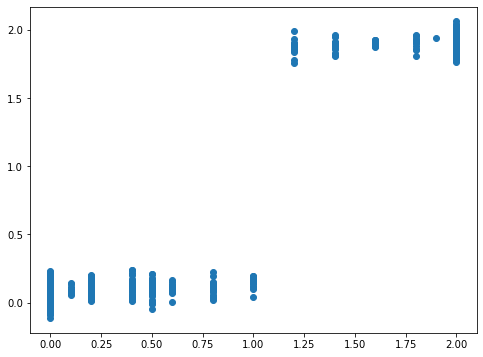

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,lr_pred)

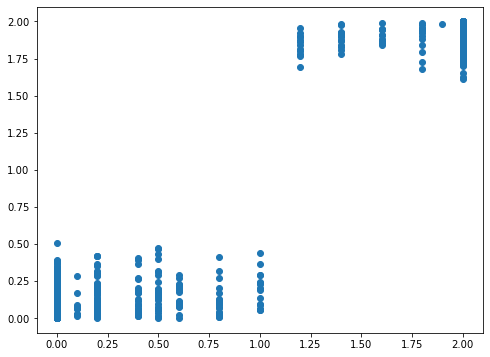

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,rfr_pred)

# Lasso and Ridge Model :-

In [116]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [117]:
lassocv=LassoCV(alphas=None,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [118]:
alpha=lassocv.alpha_
alpha

1.0622989186808962e-05

In [119]:
reg=Lasso(alpha)
reg.fit(x_train,y_train)

Lasso(alpha=1.0622989186808962e-05)

In [120]:
reg.score(x_test,y_test)

0.9436156629714173

In [121]:
ridgecv=RidgeCV(alphas=(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.1  , 0.01 ]), normalize=True)

In [122]:
alpha=ridgecv.alpha_
alpha

0.001

In [123]:
lass_reg=Ridge(alpha)
lass_reg.fit(x_train,y_train)

Ridge(alpha=0.001)

In [124]:
lass_reg.score(x_test,y_test)

0.9436136009841315

In [125]:
final_model=LinearRegression()
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=r2_score(y_test,final_model_pred)
print(acc*100)

94.36136001409835


# Saving the Linear Regression Model (Serialization):-

In [128]:
import pickle
file='Rainfall Weather Forecasting 2'
pickle.dump(lr,open(file,'wb'))

In [129]:
load=pickle.load(open('Rainfall Weather Forecasting 2','rb'))
result=load.score(x_test,y_test)
print(result*100)

94.36136001409835


# conclusion

In [130]:
conclusion=pd.DataFrame([load.predict(x_test),y_test],index=["Predicted","Original"])

In [131]:
conclusion

0         1         2         3        4         5     \
Predicted  0.058149  0.104595  0.101043  0.071176  0.16589  0.113668   
Original   0.000000  0.600000  0.000000  0.000000  0.00000  0.000000   

               6         7         8         9     ...      1343      1344  \
Predicted -0.043848 -0.060604  1.962824  0.053497  ...  0.057417  0.066764   
Original   0.000000  0.000000  1.400000  0.000000  ...  0.100000  0.000000   

               1345    1346      1347      1348      1349      1350      1351  \
Predicted  0.002198  0.0581  1.795522  1.881029  0.058504  0.075351  0.090935   
Original   0.000000  0.0000  2.000000  2.000000  0.800000  0.000000  0.000000   

               1352  
Predicted  0.035683  
Original   0.000000  

[2 rows x 1353 columns]

# Results and Conclusion:

The Linear Regression Model accuracy score is 94.361. The model does a very good job of predicting.

The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.

The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.